## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',100)
pd.set_option('Display.max_rows',100)

## Import Dataset

In [2]:
path = "../final_assignment_public/Telecom_customer_churn.csv"
df = pd.read_csv( path )

## Data Preprocessing

### Categorical data

In [3]:
# カテゴリカル変数を表示
x_cat = df[df.select_dtypes( include=object ).columns].columns

# カテゴリカル変数を落とす(理解不能なため)
df = df.drop( columns=x_cat )
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,193.333333,0.000000,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,NaN,7.0,6.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,0.0,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,3.666667,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,6.0,4.0,6.0,1.0,0.0,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,5.0,1.0,6.0,1.0,0.0,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,

### Numerical data

In [4]:
# 数値変数を確認
numerical = df[df.select_dtypes( exclude=object ).columns]
x_num = numerical.columns

# 欠損値を0で埋める
df[x_num] = numerical.fillna(0)
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,193.333333,0.000000,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,0.00000,7.0,6.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,0.0,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,3.666667,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,6.0,4.0,6.0,1.0,0.0,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,5.0,1.0,6.0,1.0,0.0,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0000,0.00,0.000,0.0000,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000

## Train Test Split

In [5]:
df_train, df_test = train_test_split( df, test_size=0.2, random_state=4 )

print( 'df_train: {}'.format( len(df_train) ) )
print( 'df_test : {}'.format( len(df_test) ) )

df_train: 80000
df_test : 20000


In [6]:
# trainデータを説明変数(X_train)と目的変数(y_train)に分割
X_train = df_train.drop( 'churn', axis=1 )
y_train = df_train['churn']
 
# testデータを説明変数(X_test)と目的変数(y_test)に分割
X_test  = df_test.drop( 'churn', axis=1 )
y_test  = df_test['churn']

## Train & Predict

In [7]:
# LightGBM model
model = LGBMClassifier(
        boosting_type='gbdt', 
        class_weight='balanced',
        objective='binary',
        metric='auc',
        max_depth=10,
        num_leaves=100
        # num_iteration=100,
        # num_threads=1,
)

In [8]:
# 学習
model.fit( X_train, y_train )

LGBMClassifier(class_weight='balanced', max_depth=10, metric='auc',
               num_leaves=100, objective='binary')

In [9]:
# 予測
y_pred = model.predict( X_test )
y_pred_prob = model.predict_proba( X_test ) # テストデータのクラス予測確率を返す

## Evaluate the model

In [10]:
# 真値と予測値の表示
df_pred = pd.DataFrame( {'churn_GT':y_test, 'churn_pred':y_pred} )
display( df_pred )

,churn_GT,churn_pred
60645,1,1
84599,1,1
59801,0,0
90055,0,0
94213,1,0
...,...,...
3081,0,0
98897,0,0
69223,0,0
34419,1,1


In [13]:
GT0   = df_pred['churn_GT'] == 0
pred0 = df_pred['churn_pred'] == 0

GT1   = df_pred['churn_GT'] == 1
pred1 = df_pred['churn_pred'] == 1

print( 'GT0: {},\tpred0: {}'.format( GT0.sum(), pred0.sum() ) )
print( 'GT1: {},\tpred1: {}'.format( GT1.sum(), pred1.sum() ) )

# acc: 正答率
acc = accuracy_score( y_test, y_pred )
print( '\nAcc:', acc )

# AUC
auc = roc_auc_score( y_test,y_pred_prob[:,1]) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print( 'AUC:', auc )

GT0: 10030,	pred0: 9693
GT1: 9970,	pred1: 10307

Acc: 0.63655
AUC: 0.6858626627639649


In [14]:
def plot_churn_ratio():
    plt.rcParams["figure.figsize"] = (7, 7)
    plt.pie( df_pred['churn_pred'].value_counts(), counterclock=True, startangle=90, colors=['tab:blue','tab:orange'])
    plt.show()

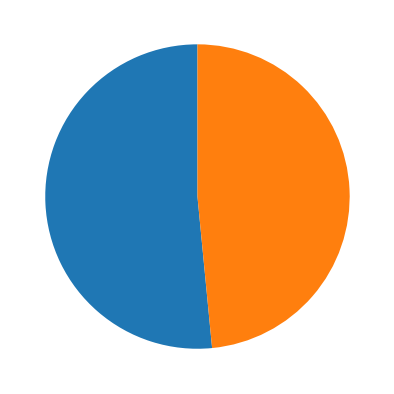

In [15]:
plot_churn_ratio()

## 仮説検証

### 解約者と予測された人のインデックスを取得

In [16]:
target_idx = df_pred[df_pred['churn_pred'] == 1].index
len( target_idx )

# 解約者と予測された人のdfを取得
df_target = df.iloc[target_idx]

### 【重要】「解約者と予測された人にのみ」仮説を適用

In [17]:
display(
    df.groupby('churn')['hnd_price'].describe(),
    df.groupby('churn')['change_mou'].describe(),
    df.groupby('churn')['change_rev'].describe(),
    df.groupby('churn')['rev_Mean'].describe()
)

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,50438.0,106.980263,61.800260,0.0,59.98999,129.98999,149.98999,499.98999
1,49562.0,94.940015,60.511218,0.0,29.98999,79.98999,149.98999,499.98999


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,50438.0,-5.321696,249.710847,-3875.00,-76.5,-2.75,69.25,4480.00
1,49562.0,-22.447663,298.035170,-3041.25,-96.5,-8.75,53.50,31219.25


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,50438.0,-1.404240,35.921011,-1107.740,-6.702500,-0.2900,1.5525,1346.9750
1,49562.0,-0.612764,61.308777,-851.105,-7.646875,-0.2875,1.5375,9963.6575


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,50438.0,59.087195,44.406267,-6.1675,33.99,48.79125,71.404375,1223.3800
1,49562.0,57.923319,48.224653,-3.7300,32.47,47.22875,69.895625,3843.2625


In [18]:
# 1. 端末の使用日数を「0」に設定
df_target['eqpdays'] = 0

# 2. 端末価格を，「非解約者の第三四分位数(150$)」に設定
df_target['hnd_price'] = 150

# 3. 月平均の使用時間の変化率を「非解約者の第三四分位数(1.7倍(=70%))」に設定
df_target['change_mou'] = 70

# 最新機種端末を提供する代わりに，請求額を増額:
#   月平均の請求額の変化率を「1.5倍(50%増)」に増額
df_target['rev_Mean'] = df_target['rev_Mean'] * 1.5
df_target['change_rev'] = 50 # 50%増

In [22]:
# 仮説を反映
df.iloc[target_idx] = df_target
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,193.333333,0.000000,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,0.00000,7.0,6.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,0.0,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,3.666667,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,6.0,4.0,6.0,1.0,0.0,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,5.0,1.0,6.0,1.0,0.0,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0000,0.00,0.000,0.0000,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000

### 再度分割

In [23]:
df_train, df_test = train_test_split( df, test_size=0.2, random_state=4 )

print( 'df_train: {}'.format( len(df_train) ) )
print( 'df_test : {}'.format( len(df_test) ) )

# trainデータを説明変数(X_train)と目的変数(y_train)に分割
X_train = df_train.drop( 'churn', axis=1 )
y_train = df_train['churn']
 
# testデータを説明変数(X_test)と目的変数(y_test)に分割
X_test  = df_test.drop( 'churn', axis=1 )
y_test  = df_test['churn']

df_train: 80000
df_test : 20000


### 再度学習&予測

In [24]:
# 学習
model.fit( X_train, y_train )

# 予測
y_pred = model.predict( X_test )
y_pred_prob = model.predict_proba( X_test ) # テストデータのクラス予測確率を返す

# 真値と予測値の表示
df_pred = pd.DataFrame( {'churn_GT':y_test, 'churn_pred':y_pred} )
display( df_pred )

,churn_GT,churn_pred
60645,1,0
84599,1,1
59801,0,0
90055,0,0
94213,1,0
...,...,...
3081,0,0
98897,0,0
69223,0,0
34419,1,0


### モデルの再評価

In [25]:
GT0   = df_pred['churn_GT'] == 0
pred0 = df_pred['churn_pred'] == 0

GT1   = df_pred['churn_GT'] == 1
pred1 = df_pred['churn_pred'] == 1

print( 'GT0: {},\tpred0: {}'.format( GT0.sum(), pred0.sum() ) )
print( 'GT1: {},\tpred1: {}'.format( GT1.sum(), pred1.sum() ) )

# acc: 正答率
acc = accuracy_score( y_test, y_pred )
print( '\nAcc:', acc )

# AUC
auc = roc_auc_score( y_test,y_pred_prob[:,1]) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print( 'AUC:', auc )

GT0: 10030,	pred0: 18014
GT1: 9970,	pred1: 1986

Acc: 0.541
AUC: 0.5847245225207026


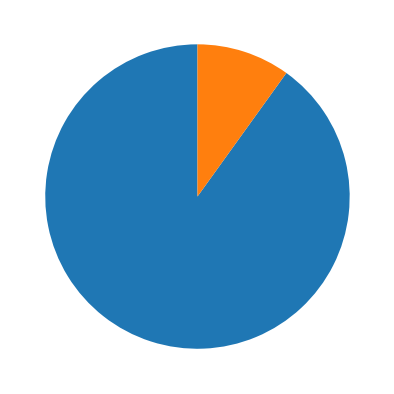

In [26]:
plot_churn_ratio()